<a href="https://colab.research.google.com/github/Vaishnavi2004V/SolarPowerOutput/blob/main/projectWork1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('SupperStore.csv')
print(df.head)

<bound method NDFrame.head of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code Reg

In [ ]:
print("The shape of the dataset ",df.shape)

The shape of the dataset  (9994, 13)


In [ ]:
print("no.of the rows in dataset",df.shape[0])
print("No.of the columns in the dataset",df.shape[1])

no.of the rows in dataset 9994
No.of the columns in the dataset 13


In [ ]:
print(df.describe())

        Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000


In [ ]:
print("Nulls present in dataset columns wise")
print(df.isnull().sum())

Nulls present in dataset columns wise
Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [ ]:
print("Total number of the null values present in the Dataset")
print(df.isnull().sum().sum())

Total number of the null values present in the Dataset
0


In [ ]:
for i in df.columns:
  print(i)

Ship Mode
Segment
Country
City
State
Postal Code
Region
Category
Sub-Category
Sales
Quantity
Discount
Profit


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
df.dtypes

,0
Ship Mode,object
Segment,object
Country,object
City,object
State,object
Postal Code,int64
Region,object
Category,object
Sub-Category,object
Sales,float64


In [ ]:
no_num_cols=df.select_dtypes(include=['int64','float64'])
print('Number of the numerical columns in the dataset',len(no_num_cols.columns))

Number of the numerical columns in the dataset 5


In [ ]:
no_cat_cols=df.select_dtypes(include=['object'])
print("No.of categerical columns present",len(no_cat_cols.columns))

No.of categerical columns present 8


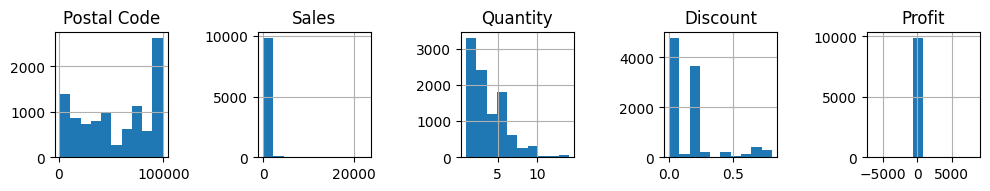

In [ ]:
df.hist(bins=10,layout=(6,5),figsize=(10,10))
plt.tight_layout()
plt.show()

In [ ]:
print(df.columns)

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Discoount'],
      dtype='object')


In [ ]:
sns.boxplot(df.columns,df)
plt.show()

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
def remove_outlier(col_name):
  sorted(col_name)
  Q1,Q3=col_name.quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_bound=Q1-(1.5*IQR)
  upper_bound=Q3+(1.5*IQR)
  return lower_bound,upper_bound

In [ ]:
low,high=remove_outlier(df.columns)
print(low,high)

AttributeError: 'Index' object has no attribute 'quantile'

In [ ]:
df['Discount'] = np.where(df['Discount']>high,high,df['Discount'])

In [ ]:
df['Discoount']=np.where(df['Discount']<low,low,df['Discount'])

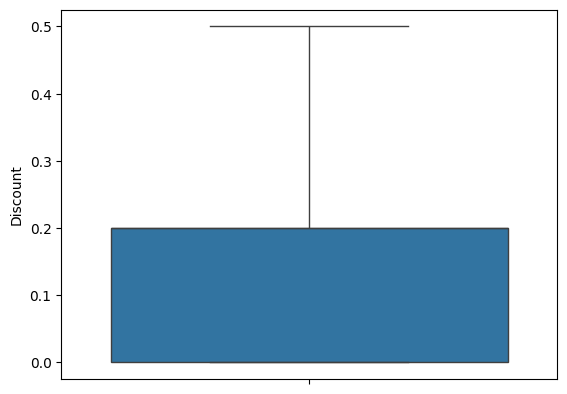

In [ ]:
sns.boxplot(y='Discount',data=df)
plt.show()

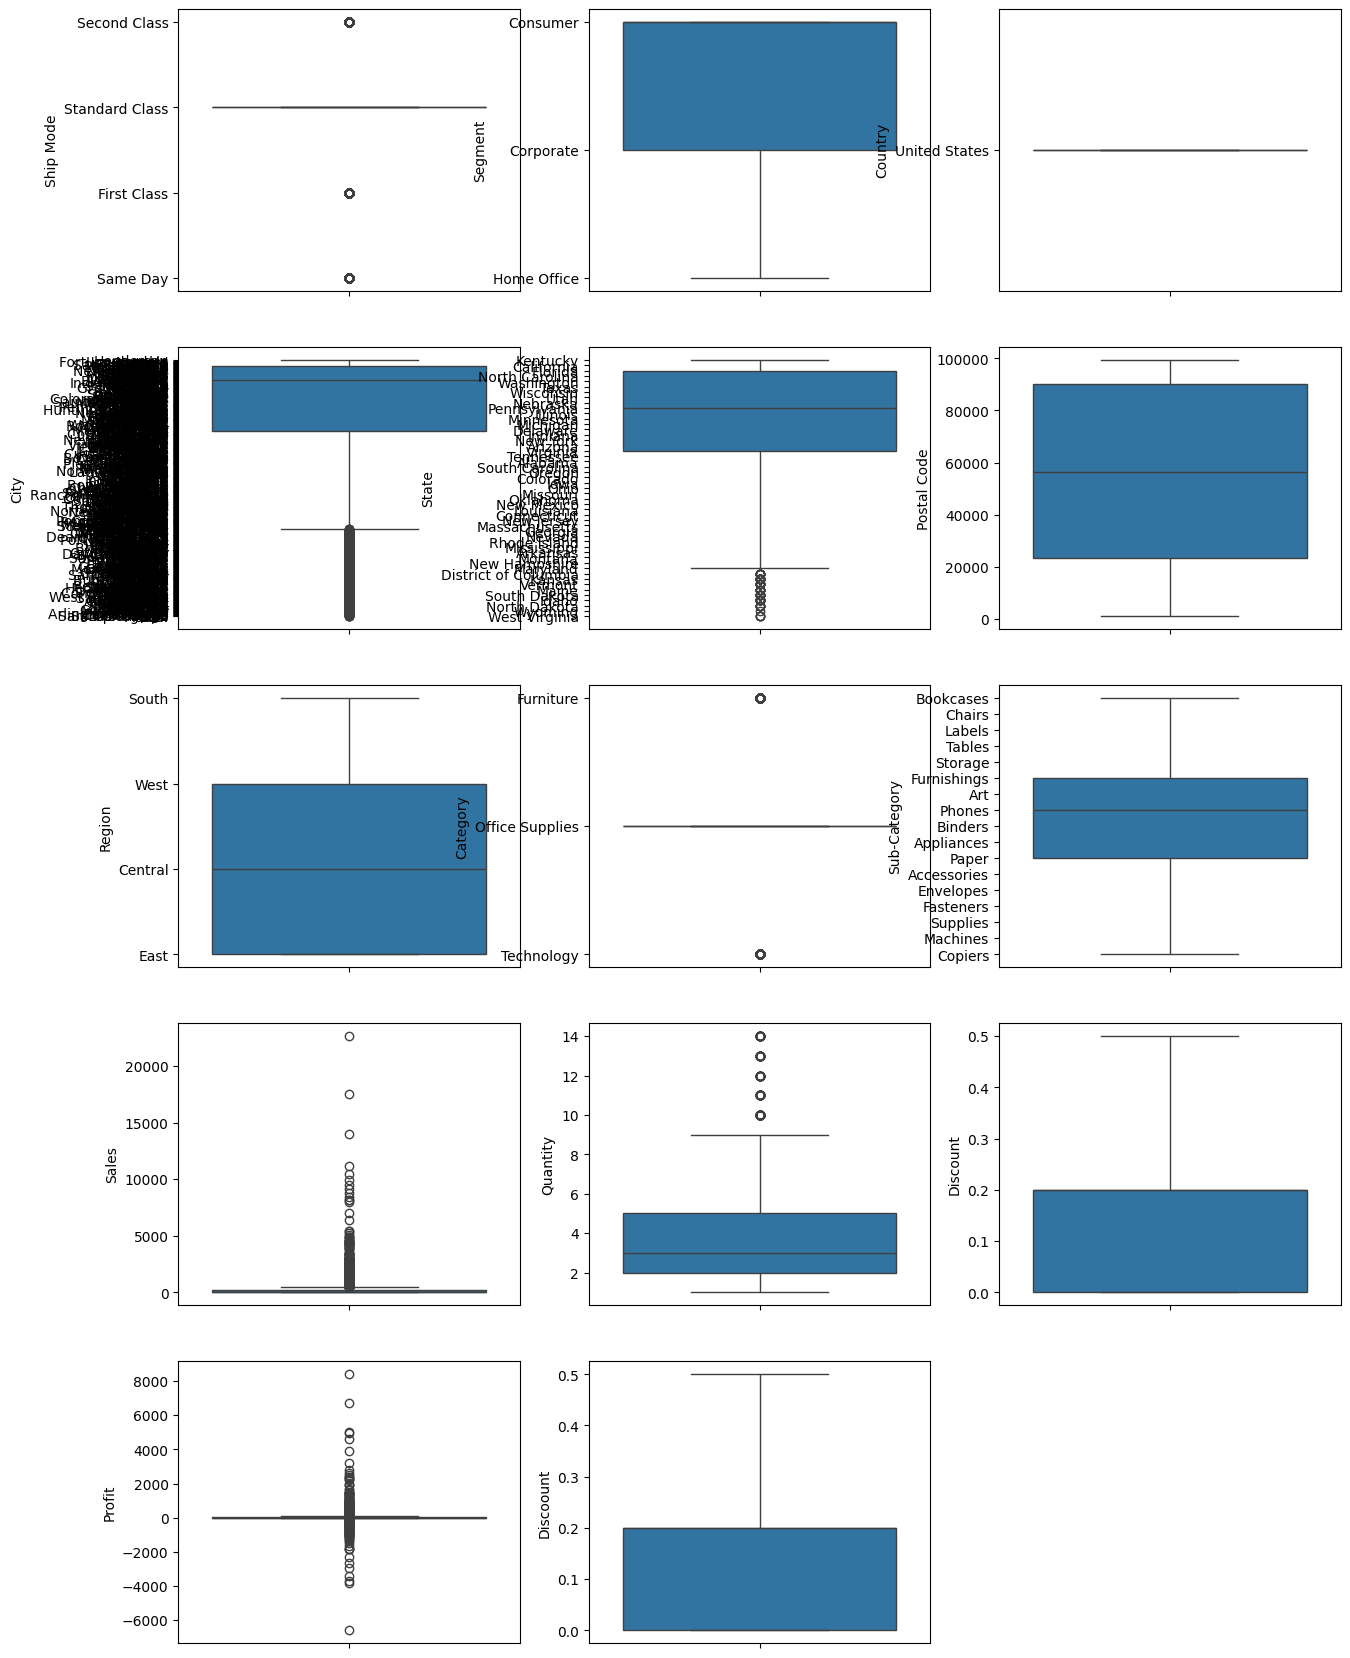

In [ ]:
plt.figure(figsize=(15, 30))
for i, column in enumerate(df.columns):
    plt.subplot(7, 3, i+1)
    sns.boxplot(df[column])
plt.show()

In [ ]:
def remove_outlier(col_name):
    sorted(col_name)
    Q1, Q3=col_name.quantile([0.25, 0.75])
    IQR=Q3-Q1
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    return lower_bound, upper_bound

In [ ]:
low,high = remove_outlier(df[column])
df[column]= np.where(df[column]>high, high, df[column])

In [ ]:
df[column] = np.where(df[column]<low, low, df[column])

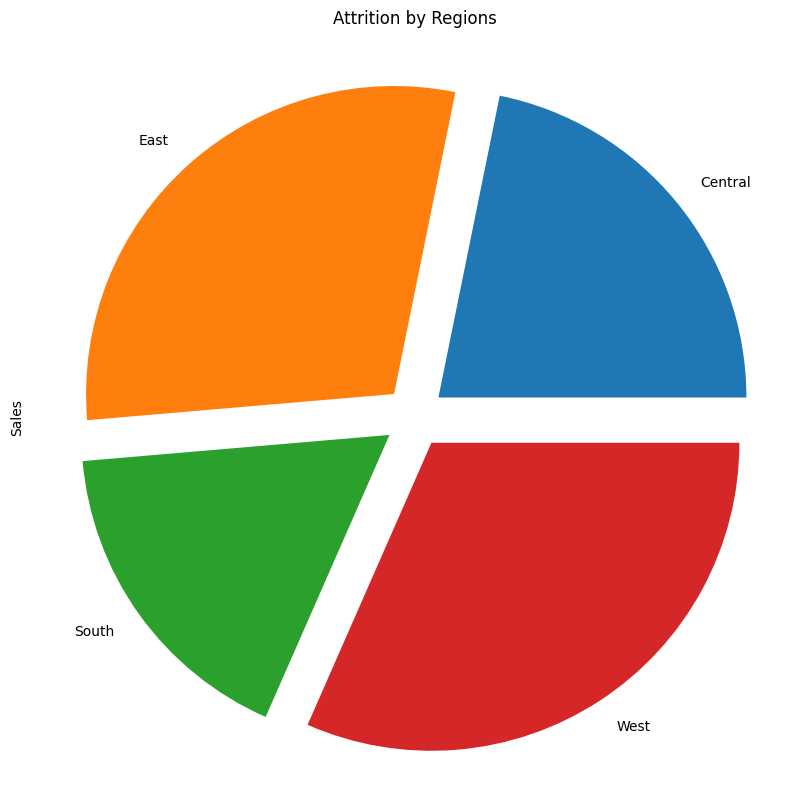

In [ ]:
num_categories = len(df_cleaned.groupby(['Region'])['Sales'].sum())

# Create the explode list with the correct length
explode = [0.1] * num_categories

plt.figure(figsize=(20,10))
# Assuming 'Sales' is the column you want to plot
df_cleaned.groupby(['Region'])['Sales'].sum().plot(kind='pie', explode=explode)
plt.title("Attrition by Regions")
plt.show()

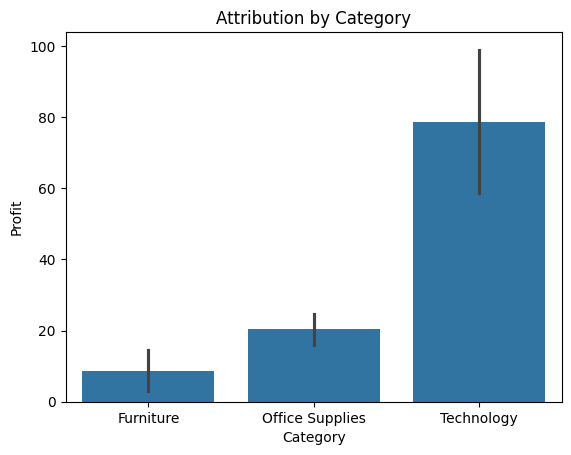

In [ ]:
sns.barplot(x='Category',y='Profit',data=df_cleaned)
plt.title("Attribution by Category")
plt.show()

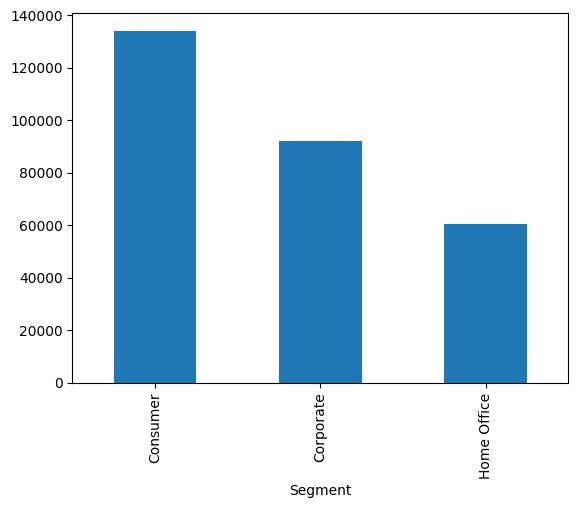

In [ ]:
df.groupby("Segment")["Profit"].sum().plot.bar()
plt.show()